# Model Development (Desarrollo del Modelo)

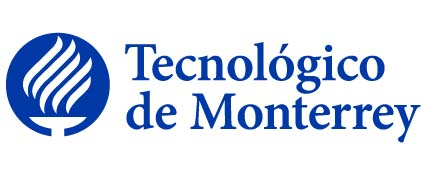

## TC4029 Ciencia y analítica de datos (Gpo 10)


### Armando Bringas Corpus (A01200230)

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


Lectura de los datos

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Regresión Lineal y Regresión Lineal Múltiple

In [4]:
# Crear objeto de regresión lineal
lm = LinearRegression()
lm

LinearRegression()

In [5]:
# Regresión lineal entre dos variables
X = df[['highway-mpg']]
Y = df['price']

lm.fit(X,Y)

LinearRegression()

In [6]:
# Hacer un predicción del modelo
Y_pred=lm.predict(X)
Y_pred[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

### Valor de la intersección

In [7]:
lm.intercept_

38423.305858157386

### Valor de la pendiente

In [8]:
lm.coef_

array([-821.73337832])

### Regresión Lineal Múltiple

In [9]:
# Variables de entrada ('input')
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [10]:
# Modelo de regresión lineal múltiple
lm.fit(Z, df['price'])

LinearRegression()

In [11]:
# Valor de la intersección
lm.intercept_

-15806.624626329198

In [12]:
# Valor de los coeficientes
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

## 2. Evaluación del Modelo Usando Visualización

### Plot de Regresión

(0.0, 48180.8708888105)

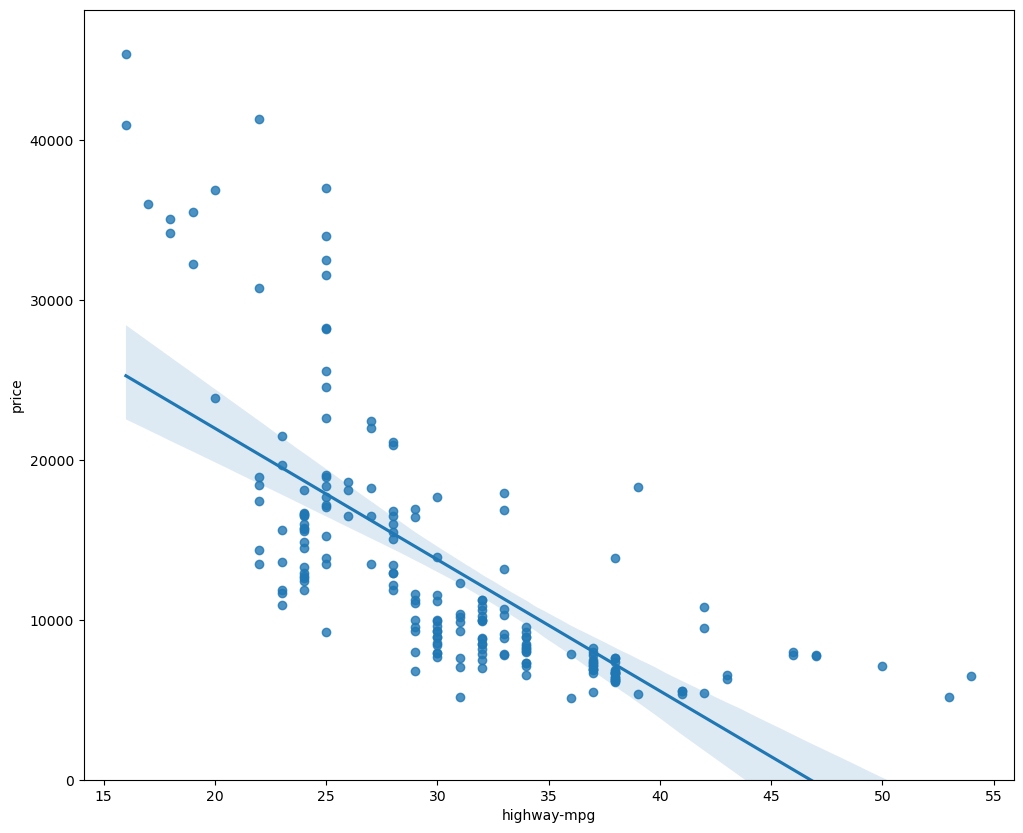

In [13]:
# visualización de la variable x 'highway-mpg' vs la variable y 'price'
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

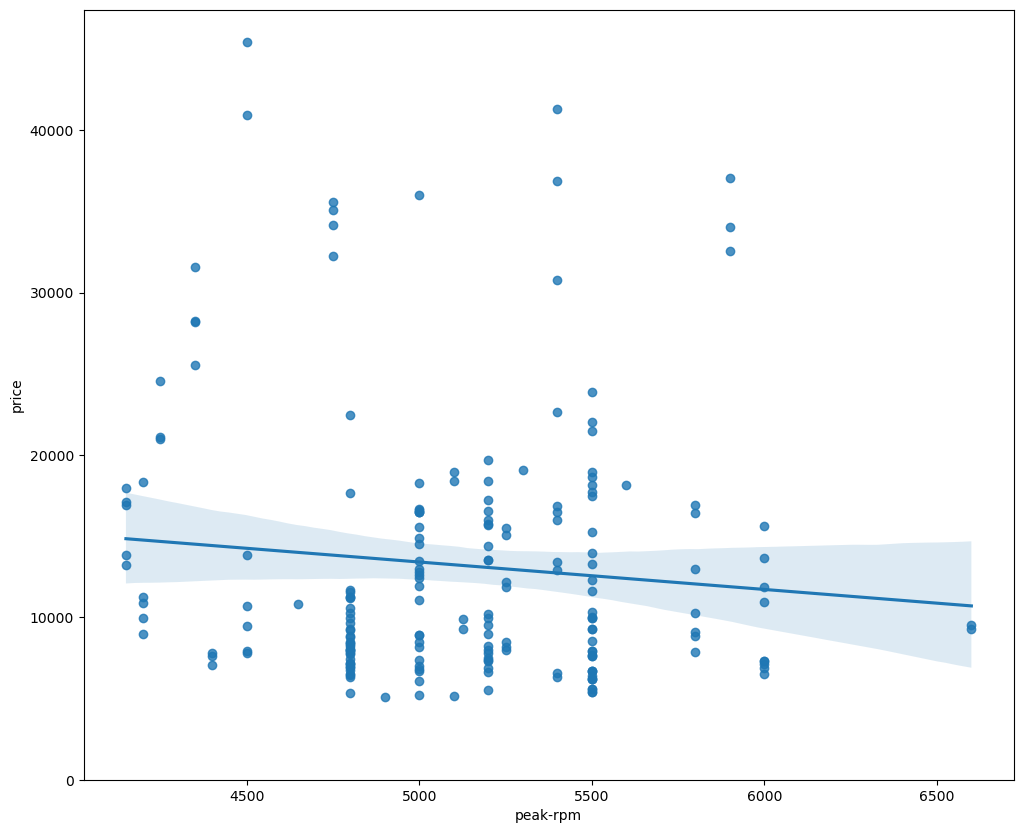

In [14]:
# ahora con x ('peak-rpm')
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

### Plot de Residuales

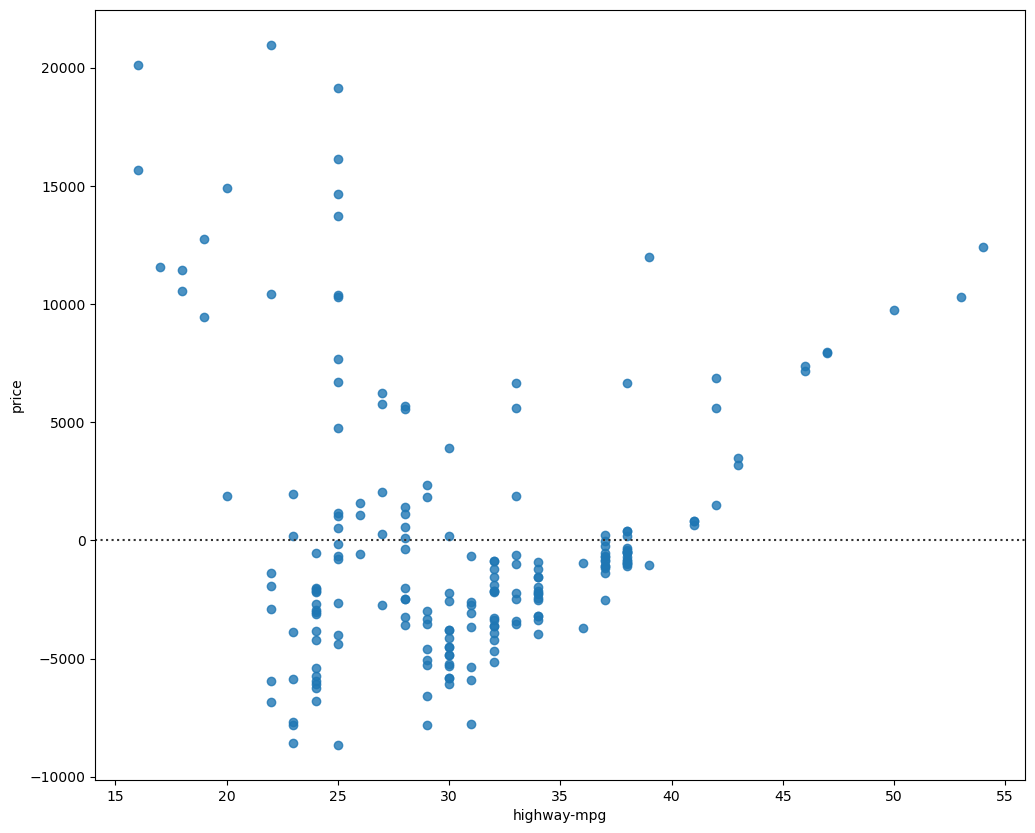

In [15]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

### Regresión Lineal Múltiple

C:\Users\bring\AppData\Local\Temp\ipykernel_22364\394805523.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\bring\AppData\Local\Temp\ipykernel_22364\394805523.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

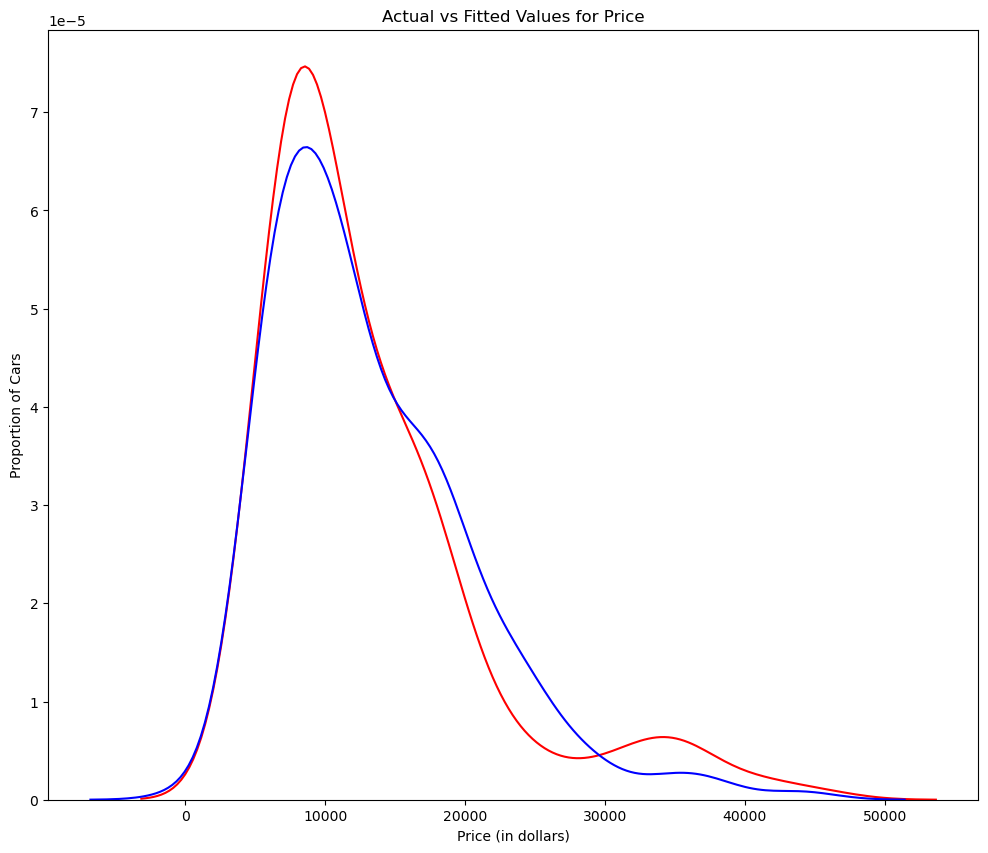

In [16]:
# Predicción
Y_hat = lm.predict(Z)

# Ploteo 
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### Regresión Polinomial y Pipelines

In [17]:
# Función para hacer el plot de los datos
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [18]:
# Variables
x = df['highway-mpg']
y = df['price']

In [19]:
# Ajuste de los datos a función polinomial
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


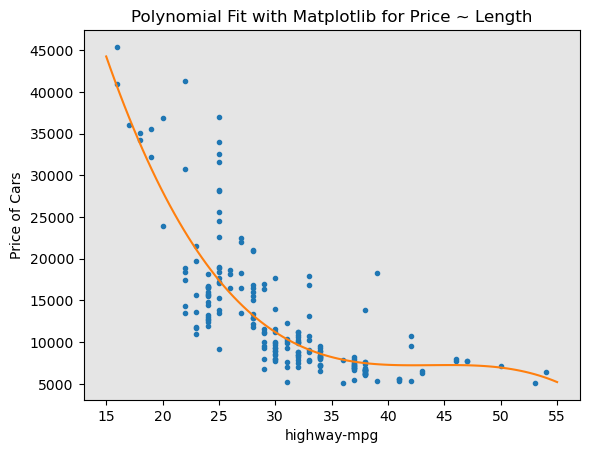

In [20]:
# Ploteo de la función
PlotPolly(p, x, y, 'highway-mpg')

### Pipelines

In [21]:
# Creación de la tupla del modelo del pipe
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [22]:
# Creación del pipeline
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [23]:
# Convesión de los datos a float para evitar problemas de conversión y ajuste del modelo
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [24]:
# Predicción del modelo
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

## 4. Medidas de evaluación 'In-Sample'

In [25]:
# Creación del modelo
lm.fit(X, Y)

# Cálculo del error cuadrado (R-square)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


In [26]:
Yhat=lm.predict(X)

# Cálculo del error MSE
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


### Ajuste Polinomial

In [29]:
# Error R-square
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [30]:
# Error MSE
mean_squared_error(df['price'], p(x))

20474146.426361218

## Predicción y toma de decisiones

In [31]:
# Nuevo input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

# Ajuste del modelo
lm.fit(X, Y)
lm

LinearRegression()

In [32]:
# Predicción
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

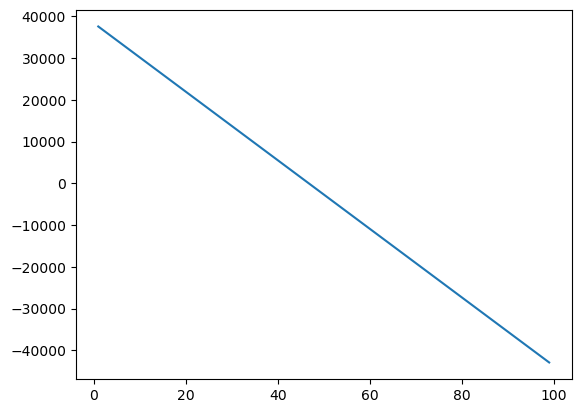

In [34]:
# Ploteo de los datos
plt.plot(new_input, yhat)
plt.show()